## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


In [3]:
#show dataframe
pd.DataFrame(combined_df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_df['Tumor Volume (mm3)'].mean()
median = combined_df['Tumor Volume (mm3)'].median()
variance = np.var(combined_df['Tumor Volume (mm3)'],ddof = 0)
std_dev = np.std(combined_df['Tumor Volume (mm3)'],ddof = 0)
SEM = combined_df['Tumor Volume (mm3)'].sem(axis=None, ddof=0)

print(f'The mean is {mean}.')
print(f'The median is {median}.')
print(f'The variance is {variance}.')
print(f'The standard deviance is {std_dev}.')
print(f'The standard error is {SEM}.')

The mean is 50.44838063133655.
The median is 48.95147442.
The variance is 79.07427999025813.
The standard deviance is 8.892372011463427.
The standard error is 0.2043818453690534.


## Bar plots

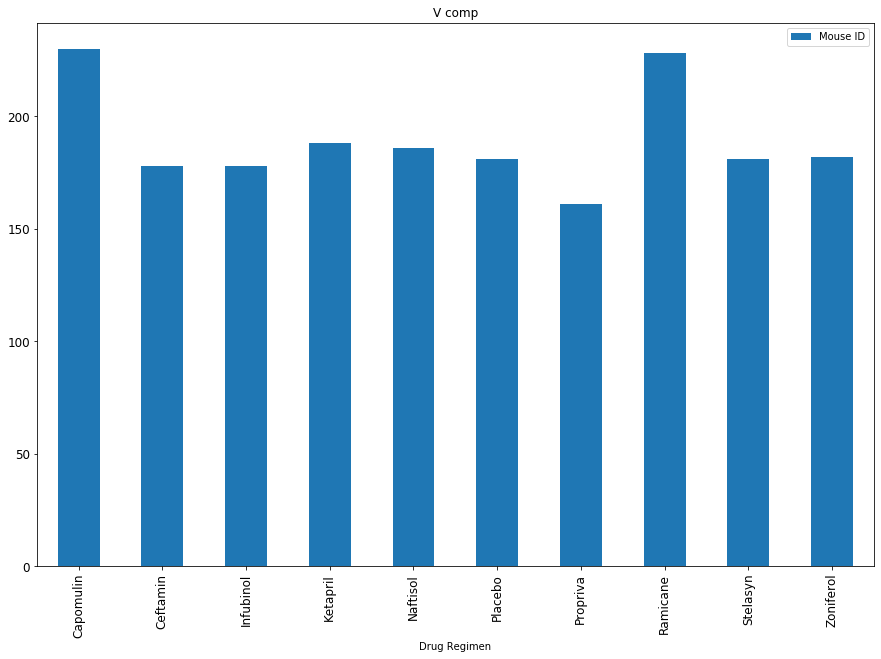

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_group = combined_df.groupby(['Drug Regimen']).count()
panda_bar = treatment_group['Mouse ID'].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)

panda_bar

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

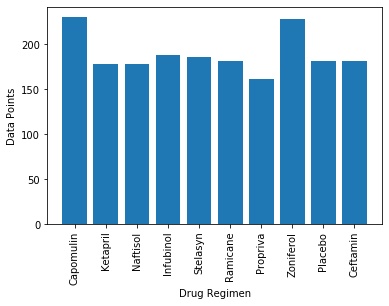

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatment_group_count = combined_df.groupby(['Drug Regimen']).count()
treatment_group = combined_df.groupby('Drug Regimen')

y_axis = treatment_group_count["Mouse ID"]
x_axis = combined_df['Drug Regimen'].unique()
plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.xticks(rotation="vertical")

## Pie plots

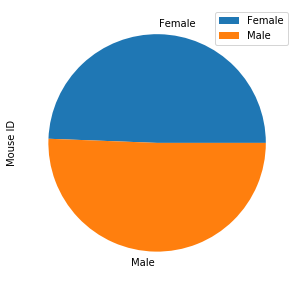

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = combined_df.groupby(['Sex']).count()
plot = mouse_sex.plot.pie(y='Mouse ID', figsize=(5, 5))


([<matplotlib.patches.Wedge at 0x1dfe3afb358>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Male'),
  Text(0.7230187918402547, 0.8290017048509963, 'Female')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

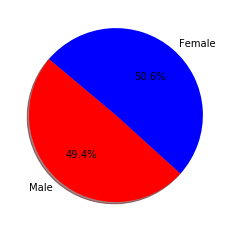

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = combined_df.groupby(['Sex']).count()
sizes = mouse_sex['Mouse ID']
labels = ['Male','Female']
colors = ["red","blue"]
explode = (0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#find top treatments regimens
top_check = combined_df.groupby(['Drug Regimen']).mean()
top_four = top_check.nsmallest(4,['Tumor Volume (mm3)'])
top_four

#separate each drug regimen
ramicane = combined_df.loc[combined_df['Drug Regimen'] == 'Ramicane']
capomulin = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
propriva = combined_df.loc[combined_df['Drug Regimen'] == 'Propriva']
ceftamin = combined_df.loc[combined_df['Drug Regimen'] == 'Ceftamin']


quartiles = top_four['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

iqr
print(f"The interquartile range of temperatures is: {iqr}")

The interquartile range of temperatures is: 11.828714856806343


([<matplotlib.axis.XTick at 0x1dfe4695ba8>,
 <a list of 4 Text xticklabel objects>)

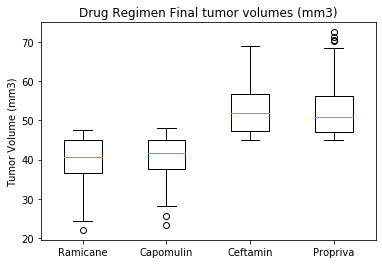

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen Final tumor volumes (mm3)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([ramicane['Tumor Volume (mm3)'], capomulin['Tumor Volume (mm3)'], ceftamin['Tumor Volume (mm3)'], propriva['Tumor Volume (mm3)']])
plt.xticks([1,2,3,4],['Ramicane', 'Capomulin', 'Ceftamin', 'Propriva'])





#boxplot = ramicane.boxplot(column=['Tumor Volume (mm3)'])

## Line and scatter plots

,Mouse ID,Timepoint,Weight (g),Tumor Volume (mm3)
228,s185,0,17,45.000000
447,s185,5,17,43.878496
671,s185,10,17,37.614948
714,s185,15,17,38.177232
968,s185,20,17,36.866876
1196,s185,25,17,33.949940
1377,s185,30,17,32.959671
1479,s185,35,17,28.328531
1652,s185,40,17,25.472143
1849,s185,45,17,23.343598


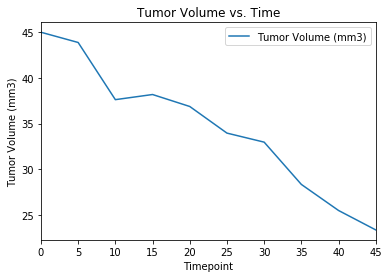

In [22]:
cap_specimens = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Drug Regimen', 'Timepoint', 'Weight (g)', 'Tumor Volume (mm3)']]
cap_specimen = cap_specimens.loc[cap_specimens['Mouse ID'] == 's185', ['Mouse ID', 'Timepoint', 'Weight (g)', 'Tumor Volume (mm3)']]
cap_specimen.plot(kind="line", x='Timepoint',y='Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time')
plt.ylabel('Tumor Volume (mm3)')
cap_specimen

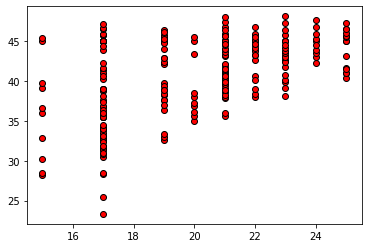

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
weight = capomulin['Weight (g)']
tumor_vol = capomulin['Tumor Volume (mm3)']

scatter = plt.scatter(weight, tumor_vol, marker="o", facecolors="red", edgecolors="black")                                                                                     
scatter

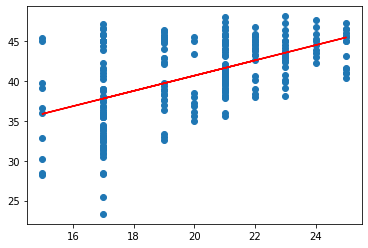

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight
y_values = tumor_vol
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, tumor_vol)
vc_fit = vc_slope * weight + vc_int
regress_values = x_values * vc_slope + vc_int
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()
